In [13]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import experiment, alpha_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [14]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_mna.xyz'.format(name), X, T_mna)

In [15]:
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )

0 252_FGG55 253_FGG99 1.89
1 252_FGG55 254_FGG300 2.23
2 252_FGG55 255_FGG252 2.06
3 252_FGG55 256_FGG366 2.37
4 252_FGG55 257_FGG215 2.05
5 252_FGG55 258_FGG224 2.15
6 252_FGG55 259_FGG380 1.28
7 252_FGG55 260_FGG412 1.80
8 252_FGG55 261_FGG444 2.16
9 252_FGG55 262_FGG470 1.91
10 252_FGG55 263_FGG80 1.51
11 252_FGG55 264_FGG114 1.61
12 252_FGG55 265_FGG357 1.89
13 252_FGG55 266_FGG691 2.19
0 252_FGG55 253_FGG99 2.00
1 252_FGG55 254_FGG300 2.28
2 252_FGG55 255_FGG252 2.15
3 252_FGG55 256_FGG366 2.49
4 252_FGG55 257_FGG215 1.88
5 252_FGG55 258_FGG224 2.50
6 252_FGG55 259_FGG380 1.32
7 252_FGG55 260_FGG412 1.89
8 252_FGG55 261_FGG444 2.20
9 252_FGG55 262_FGG470 1.95
10 252_FGG55 263_FGG80 1.56
11 252_FGG55 264_FGG114 1.95
12 252_FGG55 265_FGG357 1.94
13 252_FGG55 266_FGG691 2.68
0 252_FGG55 253_FGG99 2.25
1 252_FGG55 254_FGG300 2.61
2 252_FGG55 255_FGG252 2.57
3 252_FGG55 256_FGG366 2.75
4 252_FGG55 257_FGG215 2.17
5 252_FGG55 258_FGG224 2.40
6 252_FGG55 259_FGG380 1.50
7 252_FGG55 260_F

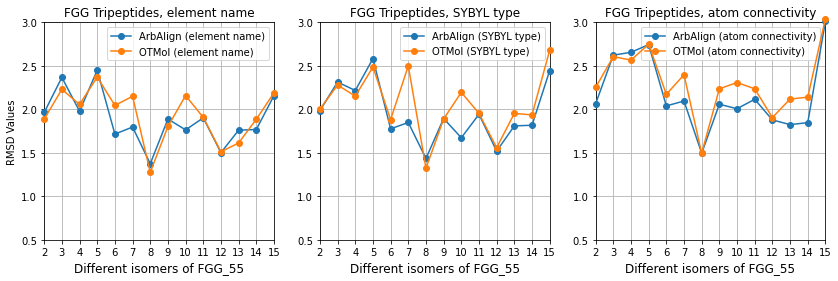

In [16]:
arbalign_res = pd.read_csv('./arbalign_output/no_reflection/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

#plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

No valid permutation found
1.0


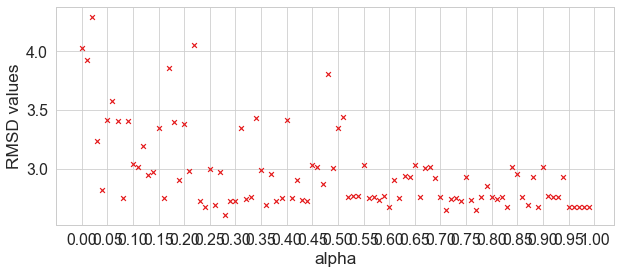

In [6]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '256_FGG366', alpha_list=alpha_list)
plt.figure(figsize=(10,4))
plt.scatter(alpha_result['alpha'], alpha_result['RMSD(OTMol+element name)'], marker='x')
plt.xlabel('alpha')
plt.ylabel('RMSD values')
plt.xticks(np.linspace(0, 1, 21))
plt.grid(True)

In [7]:
#otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,1,101), reflection=False, save=False)

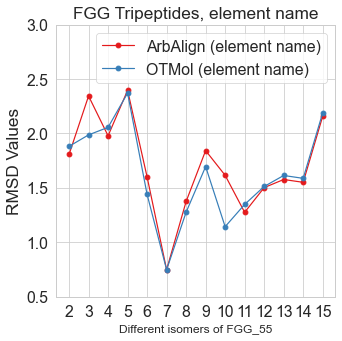

In [8]:
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

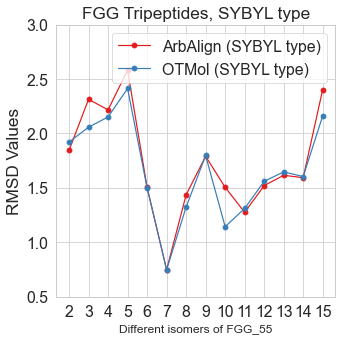

In [9]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_SYBYL_type.png', dpi=300, bbox_inches='tight')

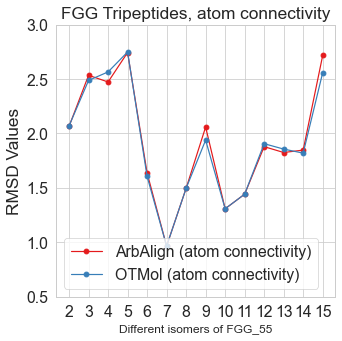

In [10]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_atom_connectivity.png', dpi=300, bbox_inches='tight')

In [11]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = 'FGG55', nameB = 'FGG224', save = False)

0.7462840440918397


In [12]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/253_FGG99.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][0]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/254_FGG300.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][1]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [34]:
# bad alignment
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/255_FGG252.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][2]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

2.0559322340713577


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
# bad alignment
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/256_FGG366.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][3]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/257_FGG215.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][4]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/259_FGG380.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][6]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/260_FGG412.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][7]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/261_FGG444.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][8]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][9]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [22]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/263_FGG80.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][10]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
# bad alignment
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/264_FGG114.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][11]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/265_FGG357.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][12]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/266_FGG691.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][13]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

GW

In [26]:
"""
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
GW_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
"""

'\ndata_path = "../Data/FGG-Tripeptide/"\nmol_pair_list_path = os.path.join(data_path, \'list\')\nmolecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type=\'FGG\')\nGW_name_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'element name\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\nGW_type_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'atom type\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\nGW_conn_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'atom connectivity\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\n'

In [27]:
"""
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    GW_name_res.rename(columns={'RMSD(GW+element name)': 'GW (element name)'}), 
    GW_type_res.rename(columns={'RMSD(GW+atom type)': 'GW (SYBYL type)'}), 
    GW_conn_res.rename(columns={'RMSD(GW+atom connectivity)': 'GW (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "GW (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "GW (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "GW (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

#plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')
"""

'\narbalign_res = pd.read_csv(\'./arbalign_output/FGG_result.csv\')\n\ncombined_df = pd.concat([\n    arbalign_res.rename(columns={\n        \'RMSD(ArbAlign+element name)\': \'ArbAlign (element name)\', \n        \'RMSD(ArbAlign+atom type)\': \'ArbAlign (SYBYL type)\',\n        \'RMSD(ArbAlign+atom connectivity)\': \'ArbAlign (atom connectivity)\'\n        }), \n    GW_name_res.rename(columns={\'RMSD(GW+element name)\': \'GW (element name)\'}), \n    GW_type_res.rename(columns={\'RMSD(GW+atom type)\': \'GW (SYBYL type)\'}), \n    GW_conn_res.rename(columns={\'RMSD(GW+atom connectivity)\': \'GW (atom connectivity)\'}\n    ), \n    ], axis=1)\n\n \nplt.figure(figsize=(14,4))\nplt.subplot(131)\ncolumns_to_plot = ["ArbAlign (element name)", "GW (element name)"]\nfor column in columns_to_plot:\n    plt.plot(range(2,16), combined_df[column], marker=\'o\', label=column, clip_on=False, zorder=10)\nplt.title("FGG Tripeptides, element name")\nplt.xlabel("Different isomers of FGG_55", fontsize = 